In [1]:
import pandas as pd 
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns 


In [2]:
data= pd.read_csv("/Users/mohamedsemaia/Downloads/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York,Florida,California
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [4]:
data.rename({"R&D Spend":"RD","Marketing Spend":"Marketing"}, inplace=True, axis=1)
data

,RD,Administration,Marketing,State,Profit,New York,Florida,California
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,1,0,0
6,134615.46,147198.87,127716.82,California,156122.51,0,0,1
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,1,0,0
9,123334.88,108679.17,304981.62,California,149759.96,0,0,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
 5   New York        50 non-null     int64  
 6   Florida         50 non-null     int64  
 7   California      50 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [8]:
data.corr()

,RD,Administration,Marketing,Profit,New York,Florida,California
RD,1.000000,0.241955,0.724248,0.972900,-0.046779,0.105711,-0.143165
Administration,0.241955,1.000000,-0.032154,0.200717,-0.018817,0.010493,-0.015478
Marketing,0.724248,-0.032154,1.000000,0.747766,-0.126541,0.205685,-0.168875
Profit,0.972900,0.200717,0.747766,1.000000,-0.054376,0.116244,-0.145837
New York,-0.046779,-0.018817,-0.126541,-0.054376,1.000000,-0.470588,-0.492366
Florida,0.105711,0.010493,0.205685,0.116244,-0.470588,1.000000,-0.492366
California,-0.143165,-0.015478,-0.168875,-0.145837,-0.492366,-0.492366,1.000000


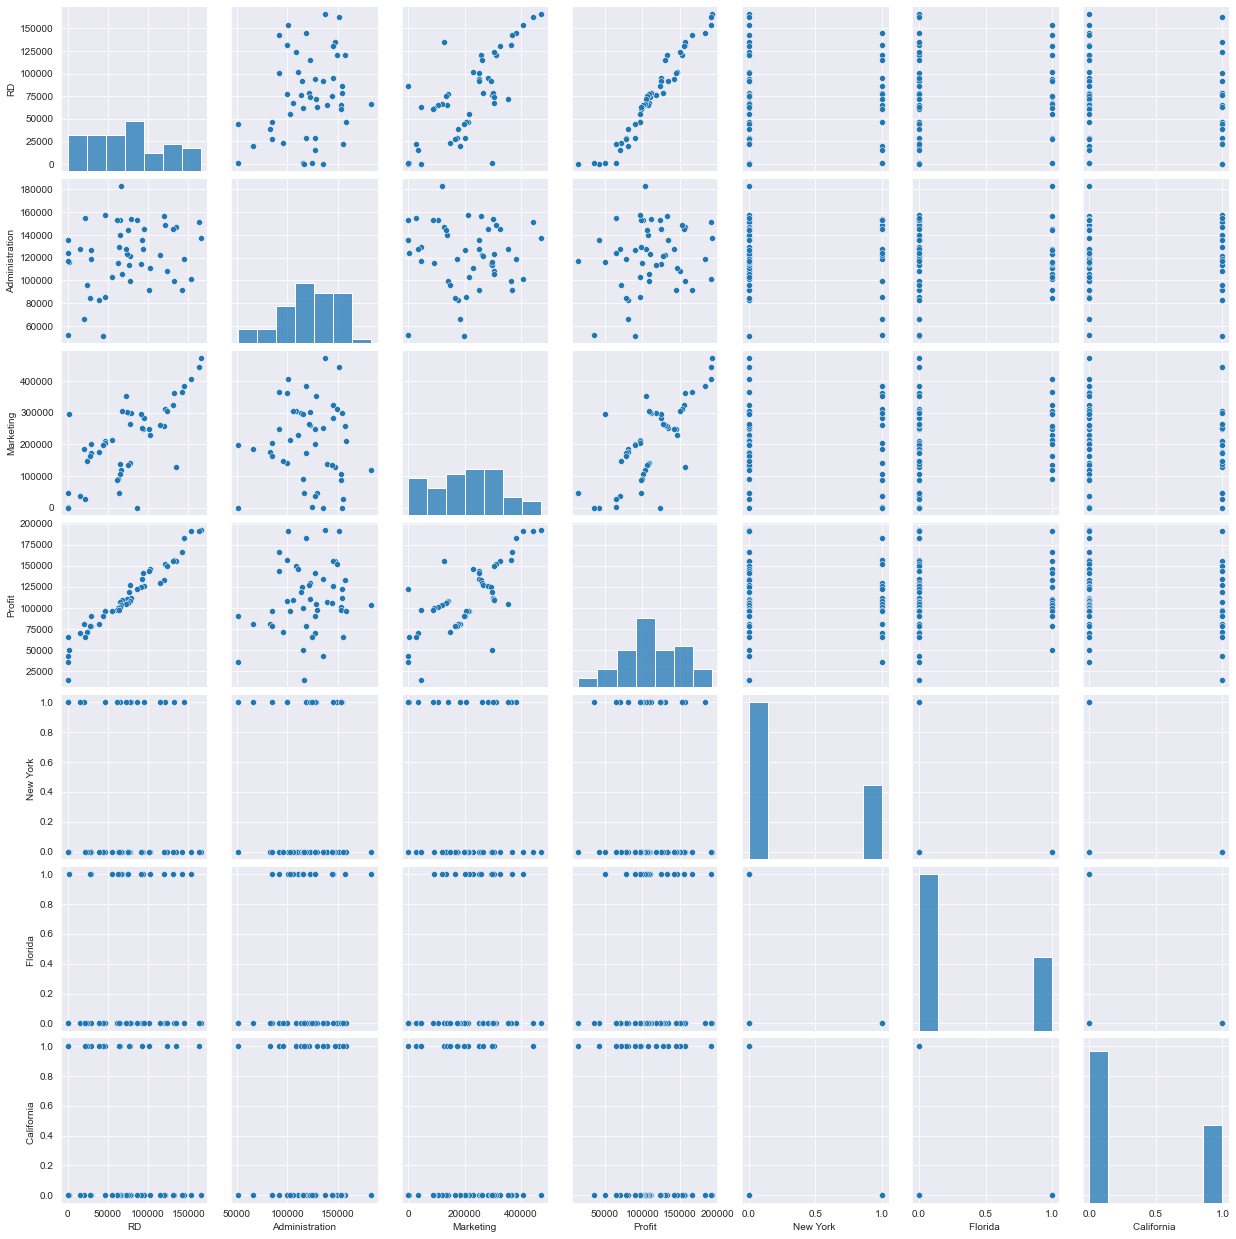

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data)


In [23]:
model=smf.ols('Profit~RD+Administration+Marketing',data=data).fit()

In [24]:
model.summary()
model.rsquared

0.9507459940683246

# Calculating VLF 

In [39]:
rsq_RD=smf.ols('RD~Administration+Marketing', data=data).fit().rsquared
vlf_RD=1/(1-rsq_RD)
print(vlf_RD)

2.4689030699947017


In [34]:
model_Prof_RD=smf.ols('Profit~RD', data= data).fit()


In [ ]:
print()


In [14]:
print(model_RD.tvalues,"\n",model_RD.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [10]:
print(model_RD.tvalues,"\n",model_RD.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [29]:
model_Administraion=smf.ols('Profit~Administration', data= data).fit()
vlf_Admin=1/(1-model_Administraion.rsquared)
print(vlf_Admin)

print(model_Administraion.tvalues,'\n',model_Administraion.pvalues)

1.0419783275699919
Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [30]:
model_marketing=smf.ols('Profit~Marketing', data=data).fit()
vlf_marketing=1/(1-model_marketing.rsquared)
print(vlf_marketing)
print(model_marketing.tvalues,'\n',model_marketing.pvalues)

2.2683636350660152
Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [42]:
final_model=smf.ols('Profit~RD+Marketing',data=data).fit()

In [14]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.16e-31
Time:                        23:37:25   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.50e-32
Time:                        23:37:25   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

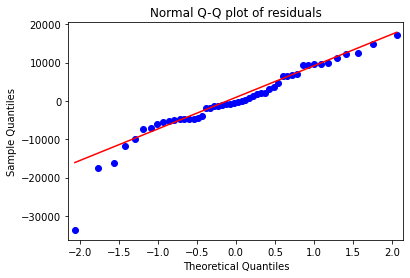

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(final_model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [17]:
list(np.where(final_model.resid<-15000))

[array([14, 15, 49])]

In [18]:
np.argmin(final_model.resid)

49

In [44]:
model_influence=final_model.get_influence()

(c,_)=model_influence.cooks_distance

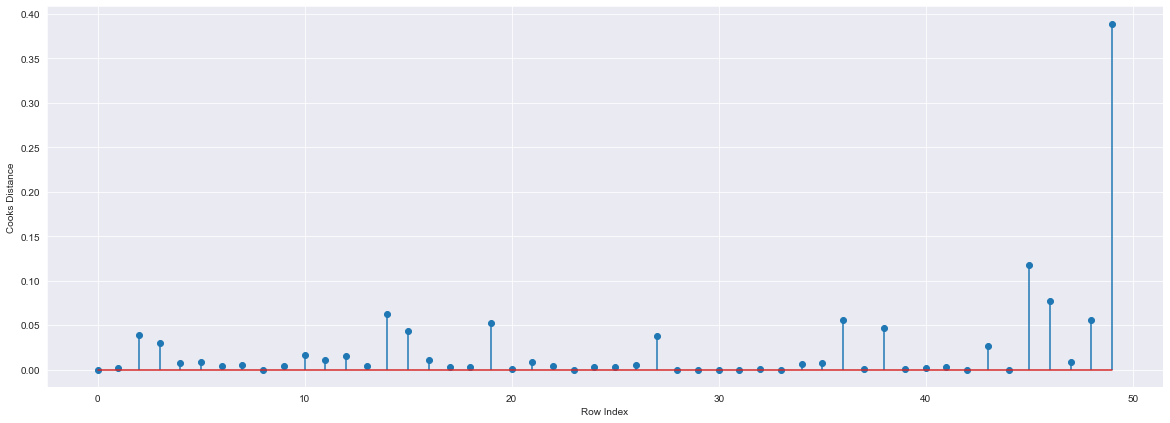

In [45]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
np.argmax(c),np.max(c)

(49, 0.3894886227924922)

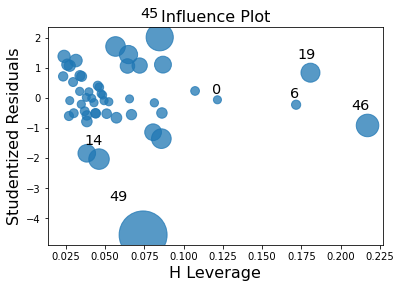

In [22]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

In [58]:
n

50

In [56]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.54

In [48]:
data2=data.drop(data.index[[49]], axis=0)

In [27]:
data2

,RD,Administration,Marketing,State,Profit,New York,Florida,California
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,1,0,0
6,134615.46,147198.87,127716.82,California,156122.51,0,0,1
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,1,0,0
9,123334.88,108679.17,304981.62,California,149759.96,0,0,1


In [49]:
model3=smf.ols("Profit~RD+Marketing", data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        00:05:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/mohamedsemaia/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


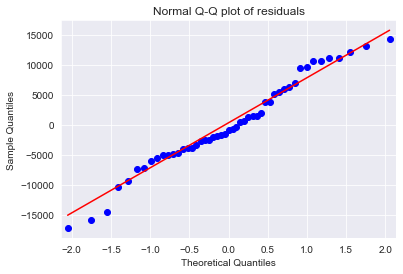

In [50]:

import statsmodels.api as sm
qqplot2=sm.qqplot(model3.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [54]:
model3_influence=model3.get_influence()

(c,_)=model3_influence.cooks_distance

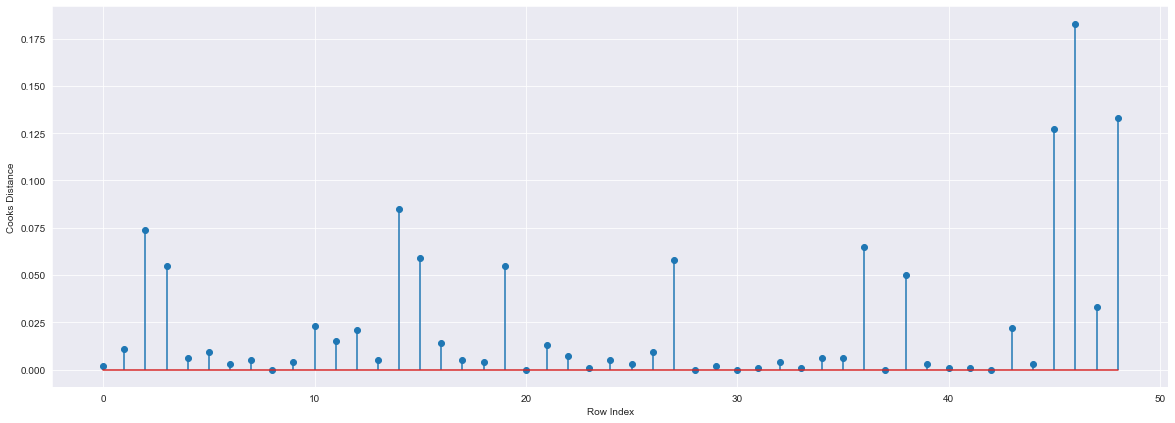

In [55]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')
plt.show()

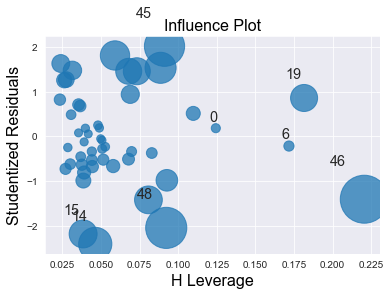

In [53]:
influence_plot(model3)
plt.show()